In [9]:
import matplotlib.pyplot as plt
from sklearn import tree
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os
import numpy as np

In [10]:
df = pd.read_csv(os.path.join("full_data.csv"))
df.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions,date,id
0,35.5,26.7,30.2,0.29,0.0,0.0,13.6,281.33,8.0,92.6,85.70,"Rain, Overcast",2019-01-01,1040
1,31.1,27.5,29.3,0.00,0.0,0.0,16.2,215.50,7.5,88.0,82.67,Overcast,2019-01-02,654
2,39.6,25.0,31.9,0.00,0.0,0.0,14.6,220.88,9.7,14.9,75.29,Clear,2019-01-03,752
3,49.5,31.9,38.4,0.00,0.0,0.0,11.3,247.21,9.9,13.4,68.89,Clear,2019-01-04,767
4,53.1,31.6,40.8,0.00,0.0,0.0,14.2,261.75,9.9,27.3,75.09,Partially cloudy,2019-01-05,792


In [23]:
len(df)

827

In [11]:
X = df[["Maximum Temperature", "Minimum Temperature", "Temperature", "Precipitation", "Snow", "Snow Depth", "Wind Speed", "Wind Direction", "Visibility", "Cloud Cover", "Relative Humidity"]]
#X = df[["Temperature","Precipitation"]]
y = df["id"].values.reshape(-1, 1)
print(X.shape, y.shape)

(827, 11) (827, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.5,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/-0.367
k: 3, Train/Test Score: 0.517/-0.036
k: 5, Train/Test Score: 0.421/0.067
k: 7, Train/Test Score: 0.377/0.110
k: 9, Train/Test Score: 0.371/0.139
k: 11, Train/Test Score: 0.349/0.149
k: 13, Train/Test Score: 0.326/0.161
k: 15, Train/Test Score: 0.310/0.161
k: 17, Train/Test Score: 0.307/0.167
k: 19, Train/Test Score: 0.305/0.168


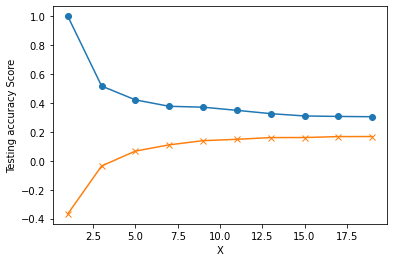

In [27]:
# # Loop through different k values to see which has the highest accuracy
# # Note: We only use odd numbers because we don't want any ties
# train_scores = []
# test_scores = []
# for k in range(1,20,2):
# #for k in range(1,200):
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_train_scaled, np.ravel(y_train,order='C'))
#     train_score = knn.score(X_train_scaled, y_train)
#     test_score = knn.score(X_test_scaled, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# plt.plot(range(1, 20, 2), train_scores, marker='o')
# plt.plot(range(1, 20, 2), test_scores, marker="x")
# plt.xlabel("X")
# plt.ylabel("Testing accuracy Score")
# plt.show()

In [28]:
# #knn = KNeighborsRegressor(n_neighbors=4)
# knn.fit(X_train_scaled, np.ravel(y_train,order='C'))
# print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.021


In [33]:
reg= RandomForestRegressor()


In [34]:
reg.fit(X_train_scaled, np.ravel(y_train,order='C'))

RandomForestRegressor()

In [35]:
reg.score(X_train_scaled, np.ravel(y_train,order='C'))

0.8925436284071964

In [36]:
reg.score(X_test_scaled, np.ravel(y_test,order='C'))

0.11941459379377728